In [1]:
# First load xi(r) kernel
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
xi_data=np.loadtxt('../xi_functions/QPM_Mash.xi',skiprows=2)
xi_r=np.genfromtxt('../xi_functions/QPM_Mash.xi',max_rows=1)
xi_mu=np.genfromtxt('../xi_functions/QPM_Mash.xi',skip_header=1,max_rows=1)

In [4]:
xi1d=xi_data.mean(axis=1)

In [41]:
from scipy.interpolate import interp1d
spl=interp1d(xi_r,xi1d)

def xi_func(r):
    if r<min(xi_r):
        return 0.
    if r>max(xi_r):
        return 1./r**4.
    else: 
        return spl(r)

(0, 300)

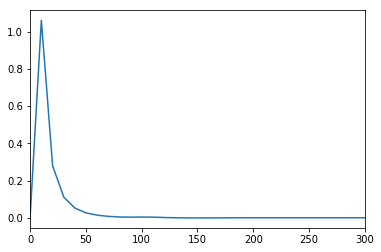

In [46]:
xis=[xi_func(nn) for nn in ns]
plt.plot(ns,xis)
plt.xlim([0,300])

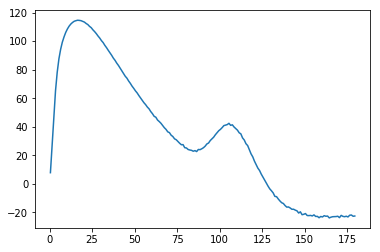

In [38]:
plt.plot(xi_r,xi1d*xi_r**2.)

In [89]:
ns=np.linspace(0.001,300,100)
ints=np.zeros_like(ns)

In [90]:
ints_r2=np.zeros_like(ns)
from scipy.special import dawsn
for i,ni in enumerate(ns):
    n=ni
    R=20.
    a=R*2.
    ints_r2[i]=dawsn(n/a)/(n*a)

In [100]:
xi_integ = lambda r: np.abs(xi_func(r))+25./pow(r+5.,2.)
for i,ni in enumerate(ns):
    n=ni
    R=20.
    integrand = lambda r: xi_integ(r)*r*(np.exp(-pow((r-n)/(2.*R),2.))-np.exp(-pow((r+n)/(2.*R),2.)))/n
    ints[i]=quad(integrand,0,10000)[0]

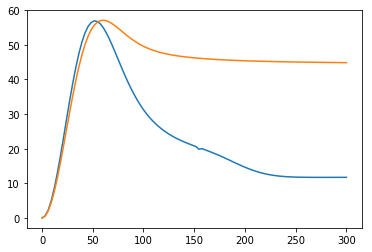

In [101]:
plt.plot(ns,ints/np.sum(ints)*ns*ns)
plt.plot(ns,ints_r2/np.sum(ints_r2)*ns*ns)